In [1]:
import pandas as pd
# 读取 GDP 和通货膨胀数据
gdp = pd.read_csv('./data/gdp.csv', index_col = 'DATE', parse_dates = True)
inflation = pd.read_csv('./data/inflation.csv', index_col = 'DATE', parse_dates = True)

# 合并数据
data = pd.concat([gdp, inflation], axis=1, join='inner')
data.columns = ['GDP', 'Inflation']

In [2]:
data

,GDP,Inflation
DATE,,
1947-01-01,243.164,21.480
1947-04-01,245.968,22.000
1947-07-01,249.585,22.230
1947-10-01,259.745,22.910
1948-01-01,265.742,23.680
...,...,...
2022-01-01,24740.480,282.599
2022-04-01,25248.476,288.611
2022-07-01,25723.941,294.628


In [3]:
from statsmodels.tsa.api import VAR

In [4]:
model = VAR(data)

In [5]:
results = model.fit(maxlags=2, ic='aic')

In [6]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, May, 2023
Time:                     23:30:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    10.0324
Nobs:                     303.000    HQIC:                   9.95886
Log likelihood:          -2351.22    FPE:                    20127.3
AIC:                      9.90983    Det(Omega_mle):         19479.2
--------------------------------------------------------------------
Results for equation GDP
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               10.927173        25.446374            0.429           0.668
L1.GDP               0.853471         0.062935           13.561           0.000
L1.Inflation        13.556743        10.407743            1.303   

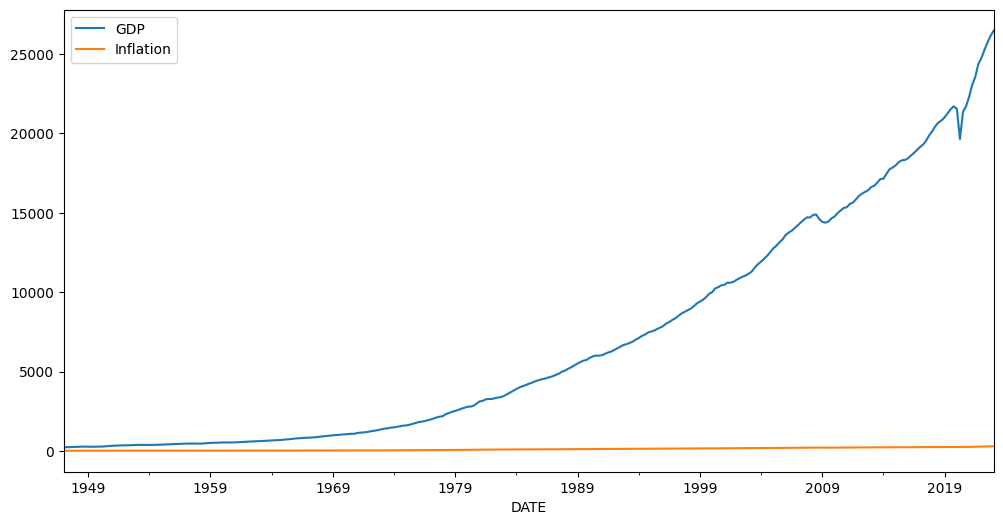

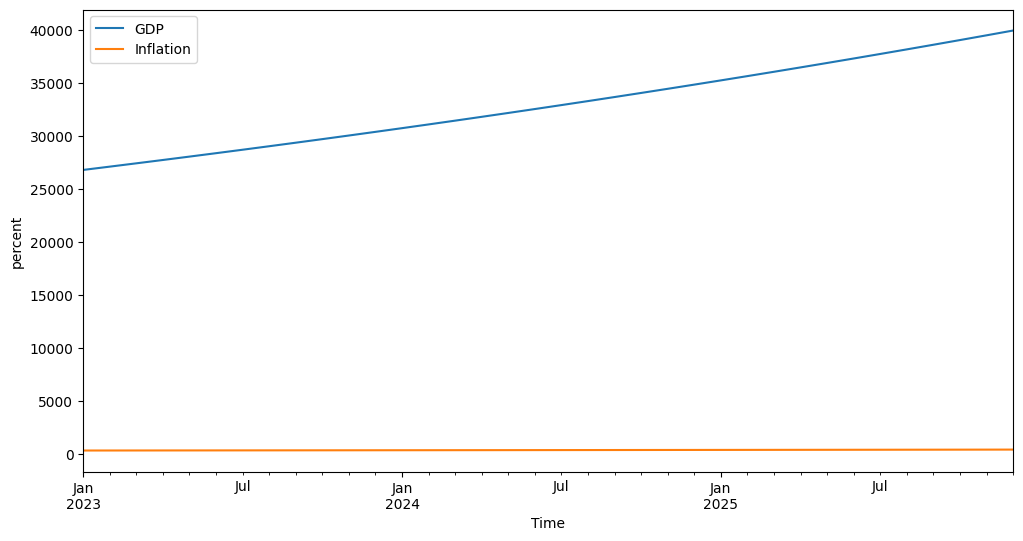

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


lag_order = results.k_ar
forecast_input = data.values[-lag_order:]
forecast = results.forecast(forecast_input, steps=12*3)
# 将预测结果可视化
forecast_index = pd.date_range(data.index[-1], periods=12*3, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['GDP', 'Inflation'])
data.plot(figsize=(12, 6), legend=True)
forecast_df.plot(figsize=(12, 6), legend=True)
plt.xlabel('Time')
plt.ylabel('percent')
plt.show()